In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')



In [28]:
df.shape

(730, 9)

In [29]:
df=df.dropna()

In [30]:
df.shape

(730, 9)

In [31]:
X=df.iloc[:,:-1] ## independent features
y=df.iloc[:,-1] ## dependent features

In [32]:
y.isnull().sum()

0

## Xgboost

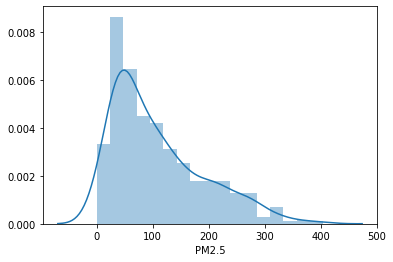

In [34]:
sns.distplot(y)

### Train Test split

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [36]:
import xgboost as xgb


In [37]:
regressor=xgb.XGBRegressor()
regressor.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:squarederror', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [38]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))

Coefficient of determination R^2 <-- on train set: 0.9997842299087093


In [39]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_test, y_test)))

Coefficient of determination R^2 <-- on train set: 0.6104024041851226


In [40]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(regressor,X,y,cv=5)

In [41]:
score.mean()

0.4545628708245175

#### Model Evaluation

In [42]:
prediction=regressor.predict(X_test)

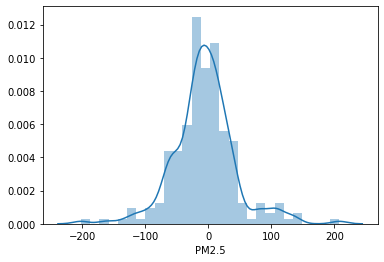

In [43]:
sns.distplot(y_test-prediction)

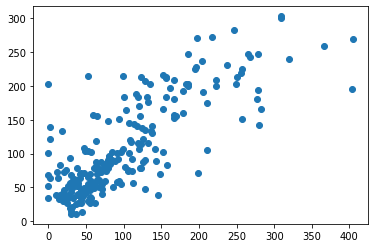

In [44]:
plt.scatter(y_test,prediction)

## Hyperparameter Tuning

In [45]:
xgb.XGBRegressor()

XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=None, importance_type='gain', interaction_constraints=None,
             learning_rate=None, max_delta_step=None, max_depth=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             objective='reg:squarederror', random_state=None, reg_alpha=None,
             reg_lambda=None, scale_pos_weight=None, subsample=None,
             tree_method=None, validate_parameters=None, verbosity=None)

In [46]:
from sklearn.model_selection import RandomizedSearchCV

In [48]:
 #Randomized Search CV

# Number of trees 
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Various learning rate parameters
learning_rate = ['0.05','0.1', '0.2','0.3','0.5','0.6']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
#Subssample parameter values
subsample=[0.7,0.6,0.8]
# Minimum child weight parameters
min_child_weight=[3,4,5,6,7]



In [49]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'subsample': subsample,
               'min_child_weight': min_child_weight}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'learning_rate': ['0.05', '0.1', '0.2', '0.3', '0.5', '0.6'], 'max_depth': [5, 10, 15, 20, 25, 30], 'subsample': [0.7, 0.6, 0.8], 'min_child_weight': [3, 4, 5, 6, 7]}


In [51]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
regressor=xgb.XGBRegressor()

In [52]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
xg_random = RandomizedSearchCV(estimator = regressor, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [53]:
xg_random.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.0s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.9s remaining:    0.0s


[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.7s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   1.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   2.9s
[CV] subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=1100, min_child_weight=6, max_depth=10, learning_rate=0.3, total=   2.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3, total=   2.2s
[CV] subsample=0.7, n_estimators=600, min_child_weight=6, max_depth=20, learning_rate=0.3 
[CV]  su

[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   1.1s
[CV] subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=500, min_child_weight=6, max_depth=15, learning_rate=0.3, total=   0.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   0.9s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2, total=   1.0s
[CV] subsample=0.7, n_estimators=1000, min_child_weight=5, max_depth=5, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.5s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.6s
[CV] subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3 
[CV]  subsample=0.8, n_estimators=500, min_child_weight=4, max_depth=30, learning_rate=0.3, total=   0.4s
[CV] subsample=0.8, n_estimators=500, min_child_weight=3, max_depth=10, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.5s
[CV] subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1 
[CV]  subsample=0.8, n_estimators=300, min_child_weight=4, max_depth=30, learning_rate=0.1, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3, total=   0.3s
[CV] subsample=0.6, n_estimators=300, min_child_weight=7, max_depth=20, learning_rate=0.3 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=1200, min_child_weight=6, max_depth=5, learning_rate=0.1, total=   0.7s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05, total=   0.1s
[CV] subsample=0.6, n_estimators=100, min_child_weight=6, max_depth=15, learning_rate=0.05 
[CV]  

[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.7s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.0s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   1.2s
[CV] subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05 
[CV]  subsample=0.6, n_estimators=1100, min_child_weight=3, max_depth=5, learning_rate=0.05, total=   0.8s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05, total=   3.1s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=3, max_depth=30, learning_rate=0.05 
[C

[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1 
[CV]  subsample=0.7, n_estimators=900, min_child_weight=7, max_depth=15, learning_rate=0.1, total=   1.0s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=7, max_depth=30, learning_rate=0.6 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=300, min_child_weight=5, max_depth=20, learning_rate=0.3, total=   0.4s
[CV] subsample=0.6, n_estimators=600, min_child_weight=4, max_depth=25, learning_rate=0.2 
[CV]  subsample

[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=100, min_child_weight=3, max_depth=5, learning_rate=0.3, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5, total=   0.1s
[CV] subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=5, learning_rate=0.5 
[CV]  subsample=0.7, n_es

[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2 
[CV]  subsample=0.6, n_estimators=700, min_child_weight=7, max_depth=5, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=100, min_child_weight=4, max_depth=30, learning_rate=0.6 
[CV]  subsample=0.7, n_e

[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.4s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6 
[CV]  subsample=0.8, n_estimators=1100, min_child_weight=5, max_depth=25, learning_rate=0.6, total=   0.5s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   0.9s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2, total=   1.3s
[CV] subsample=0.8, n_estimators=800, min_child_weight=5, max_depth=20, learning_rate=0.2 
[CV]  subs

[CV]  subsample=0.7, n_estimators=200, min_child_weight=3, max_depth=25, learning_rate=0.2, total=   0.4s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.5s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.8s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3, total=   0.7s
[CV] subsample=0.7, n_estimators=400, min_child_weight=5, max_depth=25, learning_rate=0.3 
[CV]  subsample

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.3min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_...
                   param_distributions={'learning_rate': ['0.05', '0.1', '0.2',
                                                          '0.3', '0.5', '0.6'],
                              

In [54]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [55]:
xg_random.best_params_

{'subsample': 0.6,
 'n_estimators': 100,
 'min_child_weight': 4,
 'max_depth': 10,
 'learning_rate': '0.05'}

In [57]:
xg_random.best_score_

-2641.4356387008706

In [59]:
predictions=xg_random.predict(X_test)

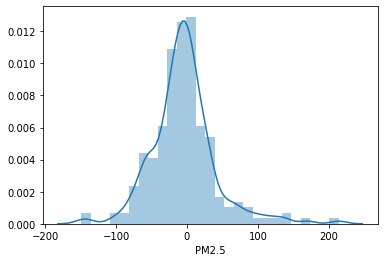

In [60]:
sns.distplot(y_test-predictions)

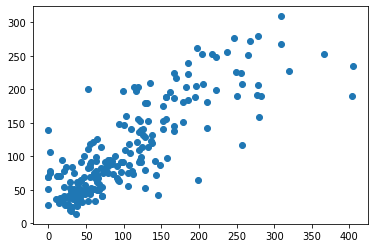

In [61]:
plt.scatter(y_test,predictions)

In [62]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 31.900516967250876
MSE: 2118.7289338890014
RMSE: 46.02965276741724


In [63]:
import pickle 

In [66]:
# open a file, where you ant to store the data
file = open('xgboost_regression_model.pkl', 'wb')

# dump information to that file
pickle.dump(xg_random, file)